In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dataset\\online_shoppers_intention.csv")

df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [6]:
df["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [7]:
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [9]:
df["OperatingSystems"].value_counts().sort_values(ascending=False)

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [10]:
# sns.pairplot(data=df)

In [11]:
df_corr = df.copy()

df_corr["Revenue"] = [1 if revenue == True else 0 for revenue in df["Revenue"]]
df_corr["Weekend"] = [1 if weekend == True else 0 for weekend in df["Weekend"]]

print(df_corr["Revenue"].value_counts(), "\n")
print(df_corr["Weekend"].value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64 

0    9462
1    2868
Name: Weekend, dtype: int64


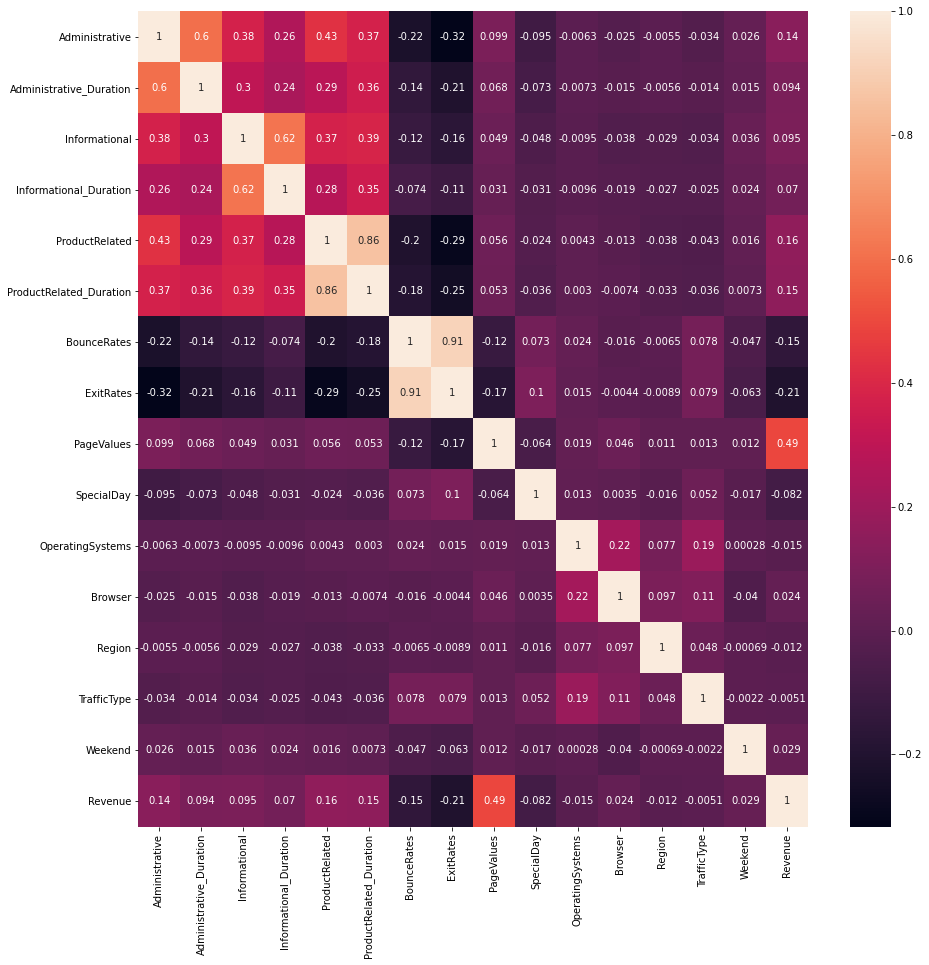

In [12]:
df_corr = df_corr.corr()

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df_corr, annot=True)
plt.show()

In [13]:
df.groupby(["SpecialDay", "Month", "Weekend"])[["Month","Weekend"]].count()

Month  Weekend
SpecialDay Month Weekend                
0.0        Aug   False      337      337
                 True        96       96
           Dec   False     1361     1361
                 True       366      366
           Feb   False       88       88
                 True        17       17
           Jul   False      328      328
                 True       104      104
           June  False      241      241
                 True        47       47
           Mar   False     1426     1426
                 True       481      481
           May   False     1626     1626
                 True       566      566
           Nov   False     2207     2207
                 True       791      791
           Oct   False      405      405
                 True       144      144
           Sep   False      352      352
                 True        96       96
0.2        Feb   False       15       15
           May   False      163      163
0.4        Feb   False       21       21
           May   False      222      222
0.6        Feb   False       19       19
           May   False      332      332
0.8        Feb   False       13       13
                 True         6        6
           May   False      306      306
1.0        Feb   True         5        5
           May   True       149      149

### Feature about  "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories

In [14]:
df[["Administrative", "Administrative_Duration", 
    "Informational", "Informational_Duration", 
    "ProductRelated", "ProductRelated_Duration"]].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


### Feature about "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction

In [15]:
df[["BounceRates", "ExitRates","PageValues"]].head(5)

,BounceRates,ExitRates,PageValues
0,0.20,0.20,0.0
1,0.00,0.10,0.0
2,0.20,0.20,0.0
3,0.05,0.14,0.0
4,0.02,0.05,0.0


### Feature about "Special Day" indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [16]:
df[["SpecialDay", "Month","OperatingSystems", "Browser", "Region", "TrafficType","VisitorType", "Weekend"]].head(5)

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,Feb,3,3,1,4,Returning_Visitor,True


### Feature about revenue of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

In [17]:
buying = df[df["Revenue"] == True].shape[0]
not_buying = df[df["Revenue"] == False].shape[0]

print(f"{buying} or {round((buying/(buying + not_buying)) * 100)}% people buy the products")
print(f"{not_buying} or {round((not_buying/(buying + not_buying)) * 100)}% people don't buy the products")

1908 or 15% people buy the products
10422 or 85% people don't buy the products


### Distribution of number of different types of pages visited by the visitor in that session and total time spent in each of these page categories

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

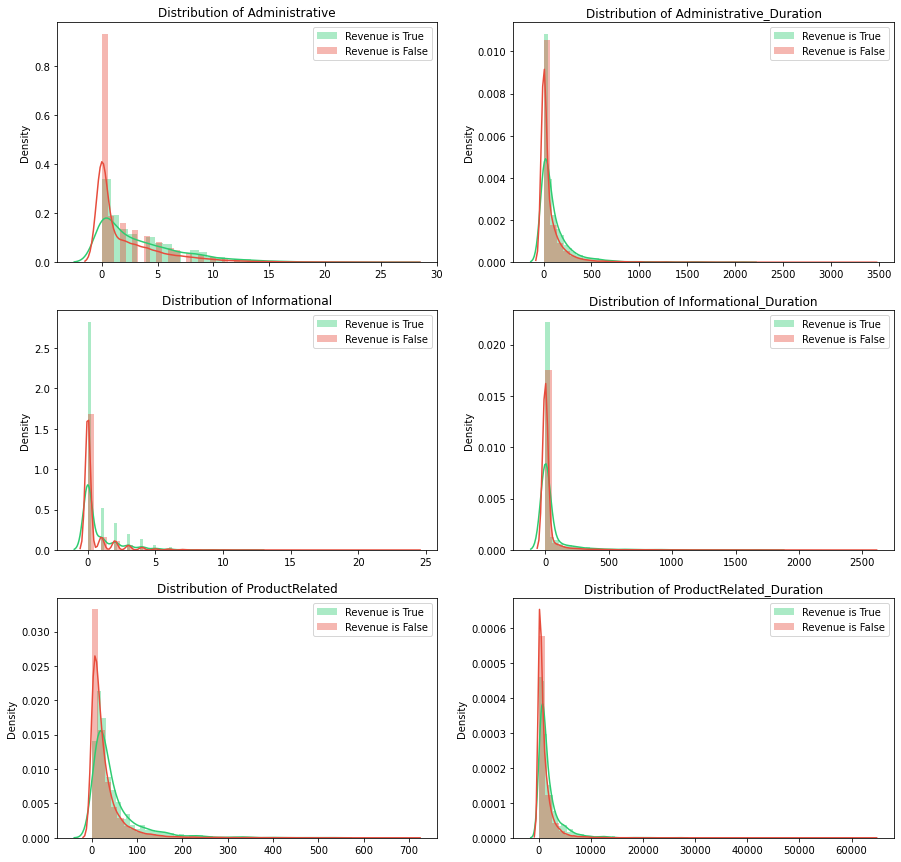

In [18]:
fig, ax = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

feature = ["Administrative", "Informational", "ProductRelated"]
feature_duration = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
buying = df["Revenue"] == True

for i in range(3):
    sns.distplot(x=df[buying][feature[i]], ax=ax[i][0], label="Revenue is True", color='#2ecc71')
    sns.distplot(x=df[~buying][feature[i]], ax=ax[i][0], label="Revenue is False", color='#e74c3c')
    
    ax[i][0].set_title(f"Distribution of {feature[i]}")
    
    ax[i][0].legend(loc="upper right")
    
for i in range(3):
    sns.distplot(x=df[buying][feature_duration[i]], ax=ax[i][1], label="Revenue is True", color='#2ecc71')
    sns.distplot(x=df[~buying][feature_duration[i]], ax=ax[i][1], label="Revenue is False", color='#e74c3c')
    
    ax[i][1].set_title(f"Distribution of {feature_duration[i]}")
    
    ax[i][1].legend(loc="upper right")
    
plt.show()

### Distribution of the metrics measured by "Google Analytics" for each page in the e-commerce site

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

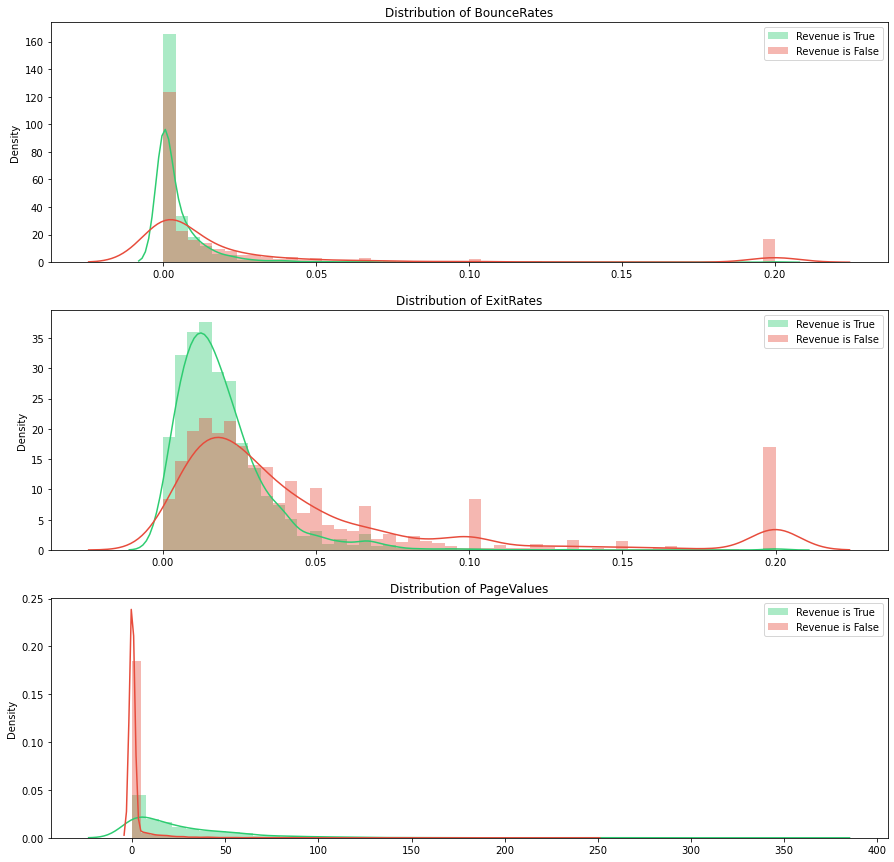

In [19]:
fig, ax = plt.subplots(figsize=(15, 15), nrows=3)

feature = ["BounceRates", "ExitRates", "PageValues"]
buying = df["Revenue"] == True

for i in range(3):
    sns.distplot(x=df[buying][feature[i]], label="Revenue is True", ax=ax[i], color='#2ecc71')
    sns.distplot(x=df[~buying][feature[i]], label="Revenue is False", ax=ax[i], color='#e74c3c')
    
    ax[i].set_title(f"Distribution of {feature[i]}")
    
    ax[i].legend(loc="upper right")
    
plt.show()

### Distribution of Special Day, Operating Systems, Browser, Region, Traffic Type

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

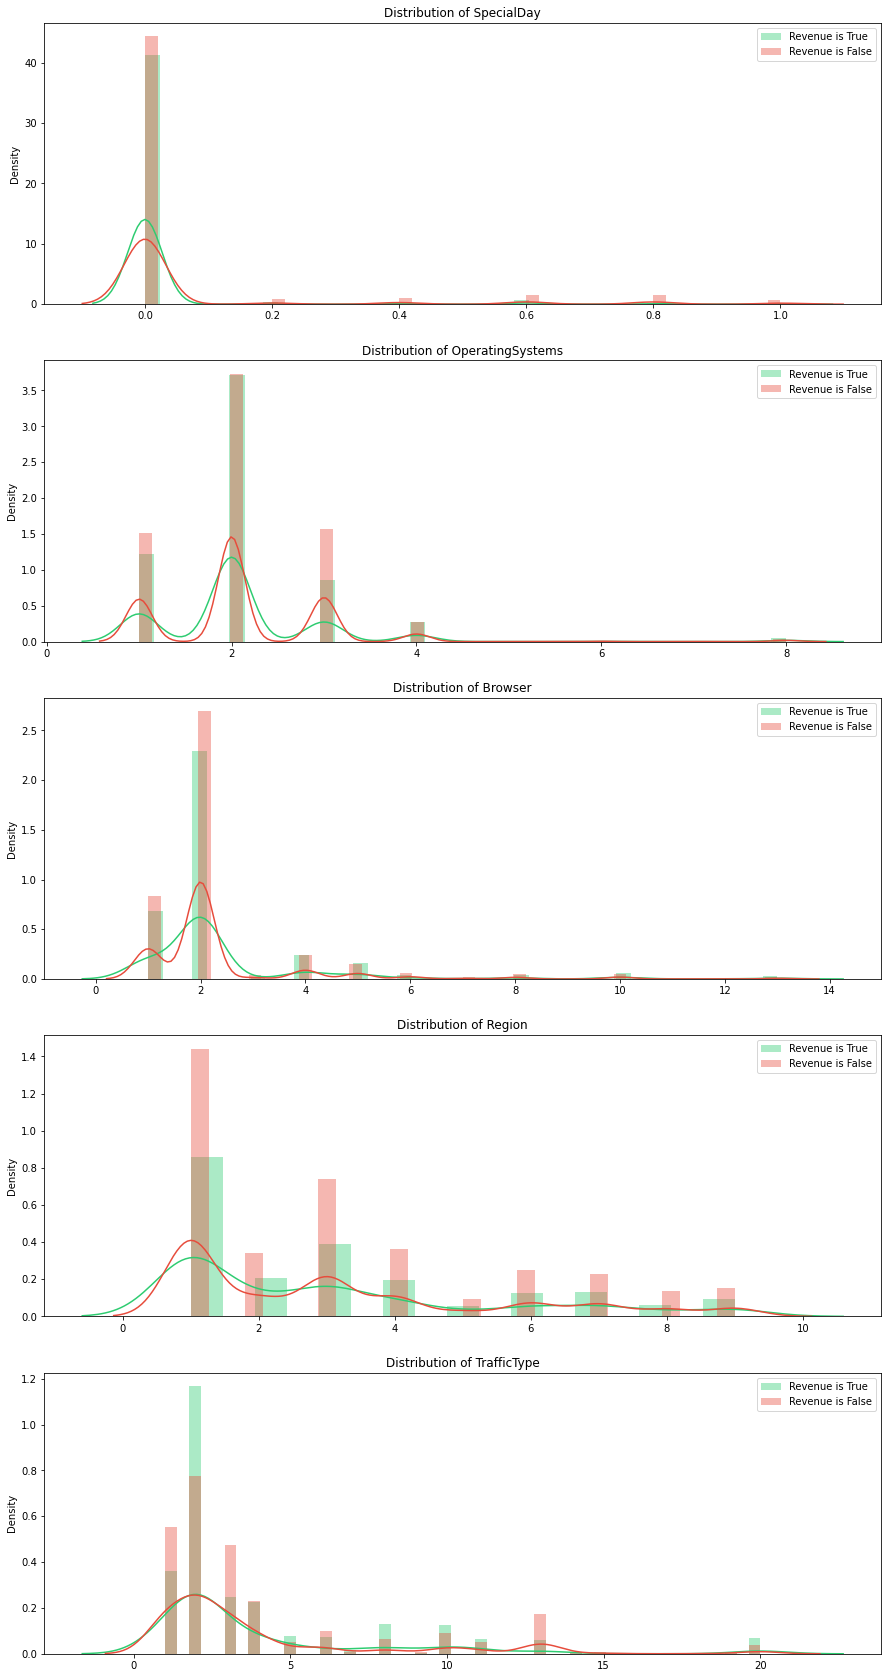

In [20]:
fig, ax = plt.subplots(figsize=(15, 30), nrows=5)

feature = ["SpecialDay","OperatingSystems", "Browser", "Region", "TrafficType"]
buying = df["Revenue"] == True

for i in range(5):
    sns.distplot(x=df[buying][feature[i]], label="Revenue is True", color='#2ecc71', ax=ax[i])
    sns.distplot(x=df[~buying][feature[i]], label="Revenue is False", color='#e74c3c', ax=ax[i])
    
    ax[i].set_title(f"Distribution of {feature[i]}")
    
    ax[i].legend(loc="upper right")
    
plt.show()

### Distribution of Month, VisitorType, Weekend

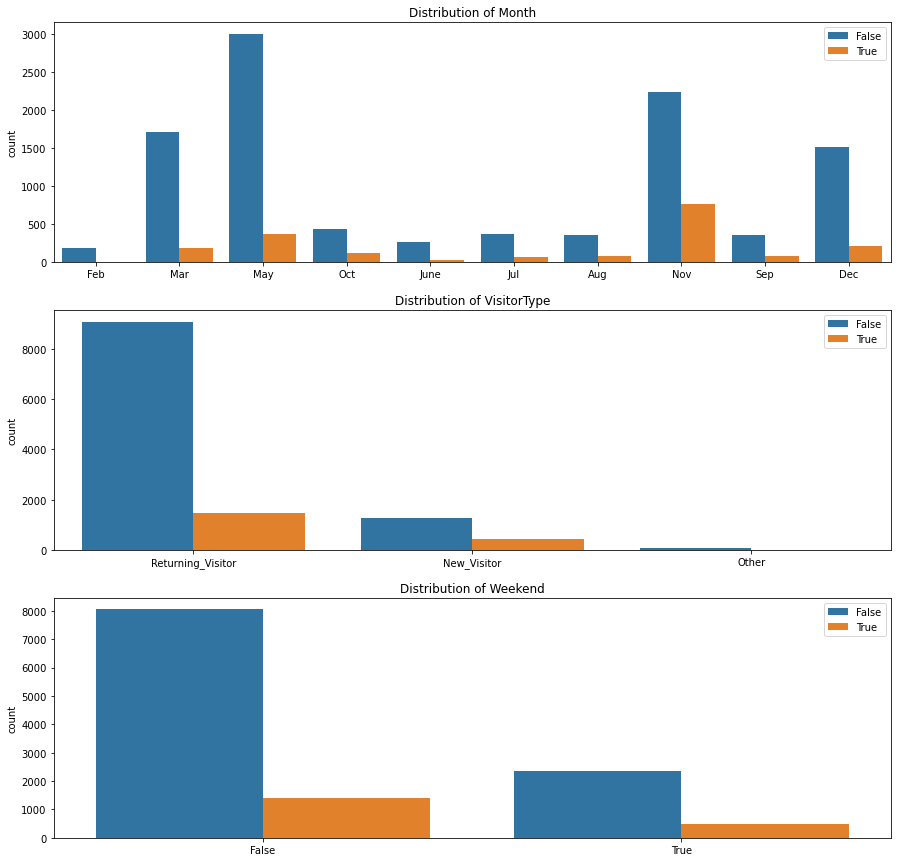

In [21]:
fig, ax = plt.subplots(figsize=(15,15), nrows=3)

feature = ["Month","VisitorType", "Weekend"]

for i in range(3):
    sns.countplot(data=df, x=feature[i], hue="Revenue", ax=ax[i])
    
    ax[i].set_title(f"Distribution of {feature[i]}")
    ax[i].set_xlabel("")
    
    ax[i].legend(loc="upper right")
    
plt.show()

# Conclusion

The shoppers more likely buy product when the Exit Rates is less than 2.5% and the Bounce Rates is less than 1%. The majority of people buy product are Returning_Visitor. The shoppers more likely buy the product when not in special day. The shoppers more likely buy product when is not weekend. The majority people buy the product in November. The majority people buy the product at browser type 2. The majority people visit the page in administrative type 0-10, product related type 0-200, informational 0-5.